# Chapter 3: Binary Classification Example Using IMDb Movie Data

In this section, we'll be using the built-in movie dataset provided by IMDb (Internet Movie Database).

<br>

## 3.4.1 The IMDb Dataset

We'll be using only the most frequently occurring 10,000 words in the dataset. This will allow us to maintain a manageable size.

In [ ]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [ ]:
print("type(train_data) = {}".format(type(train_data)))
print("train_data.shape = {}".format(train_data.shape))

In [ ]:
print("type(train_labels) = {}".format(type(train_labels)))
print("train_labels.shape = {}".format(train_labels.shape))

In [ ]:
print(train_labels[0:10])

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
reverse_word_index

In [ ]:
decoded_review

<br>

## 3.4.2 Preparing the Data

Remember, when you're feeding input into a neural network, you have to make sure that it's processed correctly. Otherwise, the network won't be able to function properly. In other words, you have to make them into tensors.

In [ ]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    
    '''
    This function will essentially transform our original data into a sort of one-hot-encoded
    dictionary of each word. We'll end up with a (25000, 10000) dataset in this case.
    
    Our new data is a 2D tensor (i.e. vector data). We have 25000 samples and 10000 features. Each
    word that appears is a feature.
    
    1. Make a basic "template" of 0's.
    2. For each entry in sequences, set specific indices to 1.
    '''
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
        
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print("type(x_train) : {}".format(type(x_train)))
print("x_train.shape : {}".format(x_train.shape))

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<br>

## 3.4.3 Building Your Network

Two things to consider when building a neural network are:

1. How many layers do we want?

2. How many hidden units should each layer have?

Having more layers may allow our network to perform better on training data, but it has a high possibility of overfitting the training data.

For now, we'll trust Mr. Chollet and go with a network that has a total of 3 layers each densely connected and the first and second layers having 16 hidden units each.

In [ ]:
from keras import models
from keras import layers


model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<br>

## 3.4 Validating Your Approach

We're going to perform cross-validation by taking 10,000 data samples from our training data as our validation data.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
print("type(x_val) = {}".format(type(x_val)))
print("x_val.shape = {}".format(x_val.shape))

print()

print("type(partial_x_train) = {}".format(type(partial_x_train)))
print("partial_x_train.shape = {}".format(partial_x_train.shape))

print()

print("x_val.shape + partial_x_train.shape = {}".format((x_val.shape[0] + partial_x_train.shape[0],
                                                         x_val.shape[1])))
print("x_train.shape = {}".format(x_train.shape))

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

<br>

## 3.4.6 Further Experiments

1. Rather than two hidden layers, try using one or three hidden layers.

2. Try using layers with more hidden units or fewer hidden units.

3. Try using the mean-squared error (MSE) loss function rather than the binary cross-entropy.

4. Trying using hyperbolic tangent ($\tanh{(\theta)}$) instead of ReLU.

In [1]:
# Preprocessing Steps

# Step 1 : Setting up

from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


# Step 2 : Preparing the data

import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
        
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Step 3 : Create cross-validation sets.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers


# Original.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Original model to be used with MSE.
model_mse = models.Sequential()
model_mse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_mse.add(layers.Dense(16, activation='relu'))
model_mse.add(layers.Dense(1, activation='sigmoid'))

# Model with one hidden layer.
model_one_layer = models.Sequential()
model_one_layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_one_layer.add(layers.Dense(1, activation='sigmoid'))

# Model with three hideen layers.
model_three_layers = models.Sequential()
model_three_layers.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_three_layers.add(layers.Dense(16, activation='relu'))
model_three_layers.add(layers.Dense(16, activation='relu'))
model_three_layers.add(layers.Dense(1, activation='sigmoid'))

# Original model with 8 hidden units.
model_eight = models.Sequential()
model_eight.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_eight.add(layers.Dense(8, activation='relu'))
model_eight.add(layers.Dense(1, activation='sigmoid'))

# Original model with 32 hidden units.
model_32 = models.Sequential()
model_32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_32.add(layers.Dense(32, activation='relu'))
model_32.add(layers.Dense(1, activation='sigmoid'))

# Original model with tanh.
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# Compile the models.

# Original.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# MSE compile.
model_mse.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Others.
model_one_layer.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

model_three_layers.compile(optimizer='rmsprop',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

model_eight.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_32.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

model_tanh.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [4]:
# Fit the models.

print("Training history_og\n")
history_og = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(x_val, y_val))

print("Training history_mse\n")
history_mse = model_mse.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

print("Training history_one_layer\n")
history_one_layer = model_one_layer.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=20,
                                        batch_size=512,
                                        validation_data=(x_val, y_val))

print("Training history_three_layers\n")
history_three_layers = model_three_layers.fit(partial_x_train,
                                              partial_y_train,
                                              epochs=20,
                                              batch_size=512,
                                              validation_data=(x_val, y_val))

print("Training history_eight\n")
history_eight = model_eight.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))

print("Training history_32\n")
history_32 = model_32.fit(partial_x_train,
                          partial_y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_val, y_val))

print("Training history_tanh\n")
history_tanh = model_tanh.fit(partial_x_train,
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.5113 - acc: 0.7853 - val_loss: 0.3773 - val_acc: 0.8701
Epoch 2/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.3036 - acc: 0.8991 - val_loss: 0.3011 - val_acc: 0.8891
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.2209 - acc: 0.9277 - val_loss: 0.2778 - val_acc: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1774 - acc: 0.9410 - val_loss: 0.2861 - val_acc: 0.8858
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1423 - acc: 0.9543 - val_loss: 0.2950 - val_acc: 0.8831
Epoch 6/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1188 - acc: 0.9633 - val_loss: 0.2980 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - 

15000/15000 [==============================] - 2s 154us/step - loss: 0.0151 - acc: 0.9963 - val_loss: 0.5820 - val_acc: 0.8721
Epoch 16/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.0030 - acc: 0.9999 - val_loss: 0.6202 - val_acc: 0.8708
Epoch 17/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.6535 - val_acc: 0.8723
Epoch 18/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6750 - val_acc: 0.8693
Epoch 19/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7109 - val_acc: 0.8686
Epoch 20/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0143 - acc: 0.9963 - val_loss: 0.7409 - val_acc: 0.8698
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.4893 - acc: 0.7863 - val_loss: 0.3541 - val_ac

In [46]:
# Plot the results.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Output graphs for both loss and accuracy.
def plot_graphs(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(loss_values) + 1)
    
    f = plt.figure(figsize=(15, 15))
    ax1 = f.add_subplot(221)
    plt.grid(True)
    ax2 = f.add_subplot(222)
    plt.grid(True)
    
    ax1.plot(epochs, loss_values, 'b-', label='Training loss')
    ax1.plot(epochs, val_loss_values, 'r-', label='Validation loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, labels)
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2.plot(epochs, acc, 'b-', label='Training acc')
    ax2.plot(epochs, val_acc, 'r-', label='Validation acc')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(handles2, labels2)
    
    plt.show()

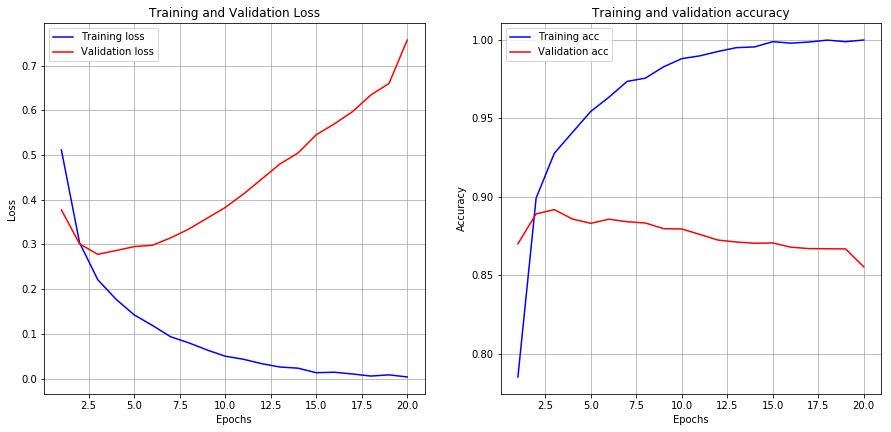

In [47]:
plot_graphs(history_og)

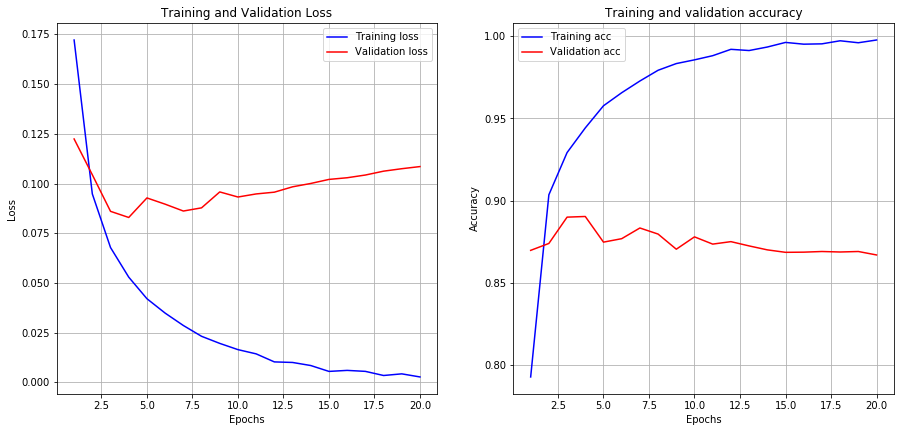

In [38]:
plot_graphs(history_mse)

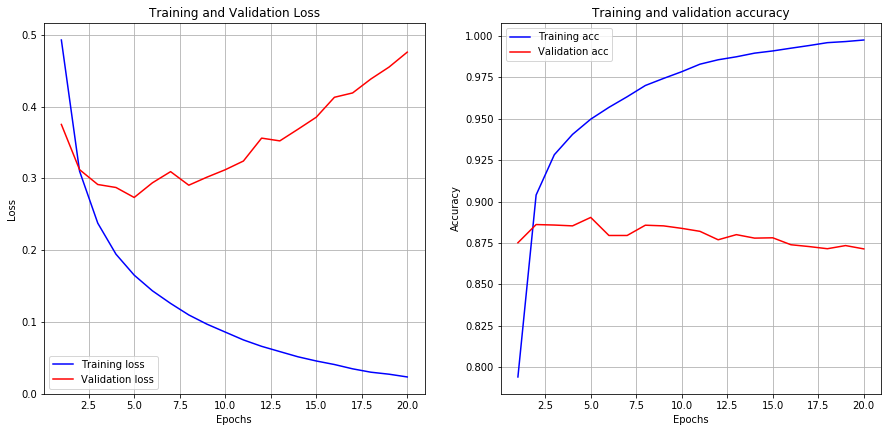

In [39]:
plot_graphs(history_one_layer)

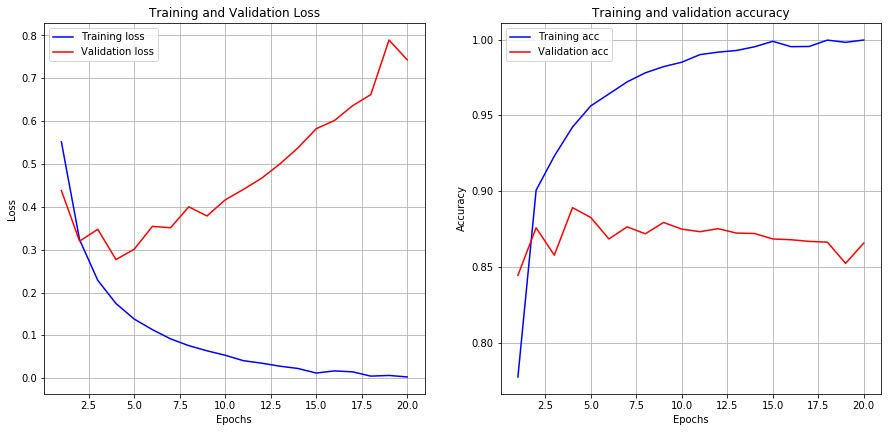

In [40]:
plot_graphs(history_three_layers)

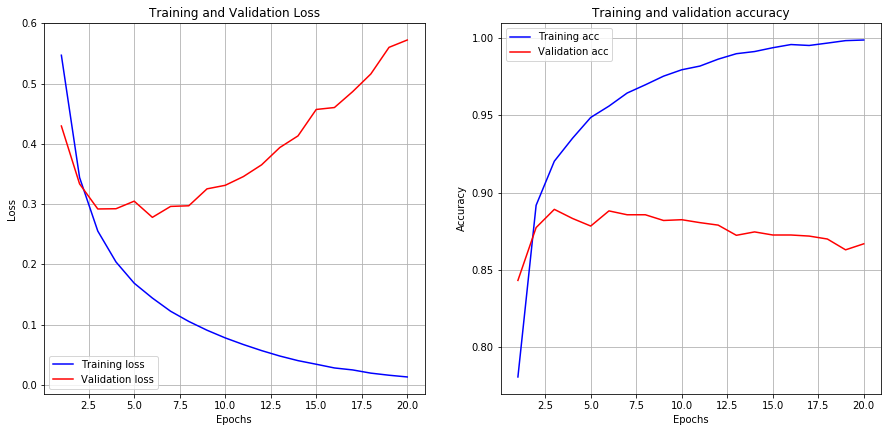

In [41]:
plot_graphs(history_eight)

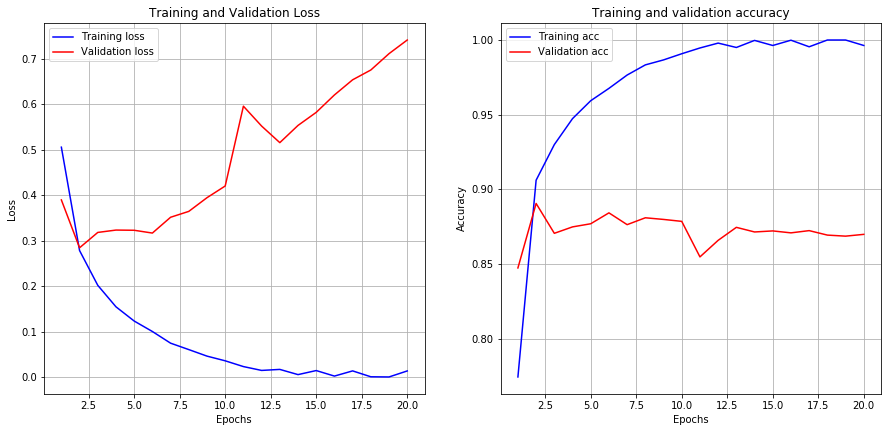

In [42]:
plot_graphs(history_32)

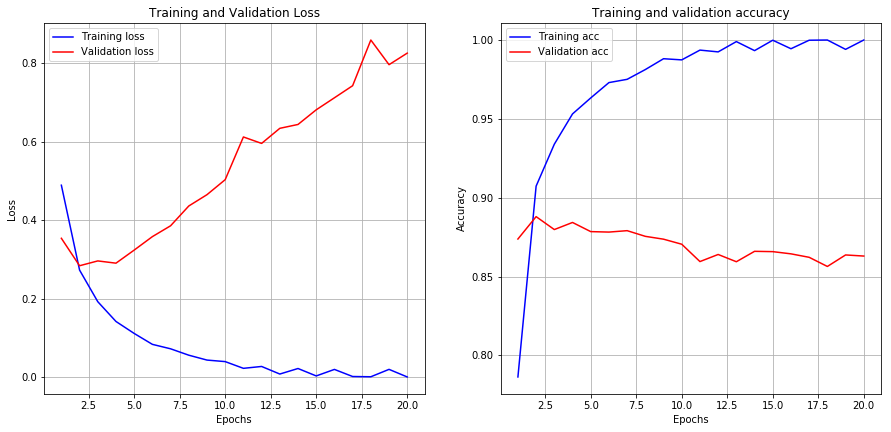

In [43]:
plot_graphs(history_tanh)

## Result Analysis

Adding more layers, hidden units, and using the $\tanh$ activation function rather than the ReLU has caused models to overfit quickly. I wonder what this means?

## 3.4.7 Wrapping Up

1. You need to do a lot of preprocessing on your data before you actually feed it to your neural network. You want your data to be tensors.

2. Stacks of `Dense` layers (i.e. fully-connected layers) using the ReLU function (i.e. $f(x) = \text{max}(0, x)$) can be used to solve a wide range of problems.

3. In a binary classification example like this one, your network should end in a `Dense` layer with the sigmoid activation function so that you can get a probability as output.

4. On a binary clasification problem with the output being a probability between 0 and 1, binary cross-entropy is a good loss measure.

5. The RMRprop optimizer is usually a good default choice regardless of your problem.

6. Neural networks start to overfit quite easily, so it's important to monitor the state of your network.